# Plot Structure Analysis

In [1]:
import nltk
import nltk.data
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np



In [2]:
def moving_avarage(x, w):
  return np.convolve(x, np.ones(w)/w, mode='valid')/w

In [3]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sia = SentimentIntensityAnalyzer()
book = "../data/Angels & Demons - Dan Brown.txt"

In [4]:
fb = open(book, "r", encoding="utf8")
raw = fb.read()
lines = tokenizer.tokenize(raw)
x = []
y = []
for idx, line in enumerate(lines):
  x.append(idx)
  y.append(sia.polarity_scores(line)['compound']*100)

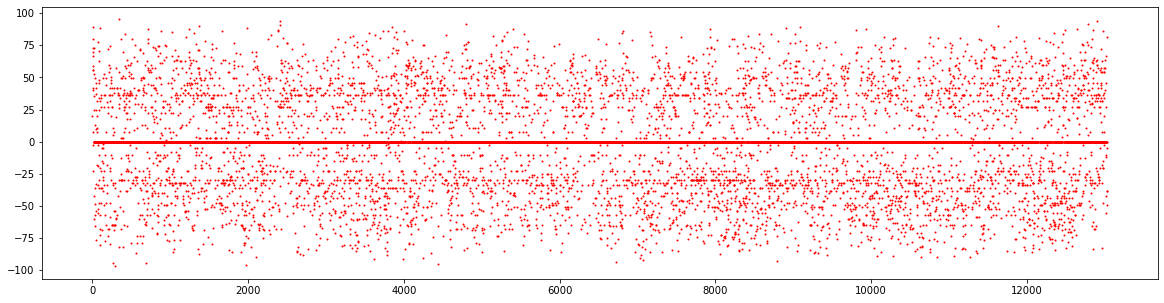

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5))
ax.scatter(x, y, c='r', marker='o', s=1)
plt.show()

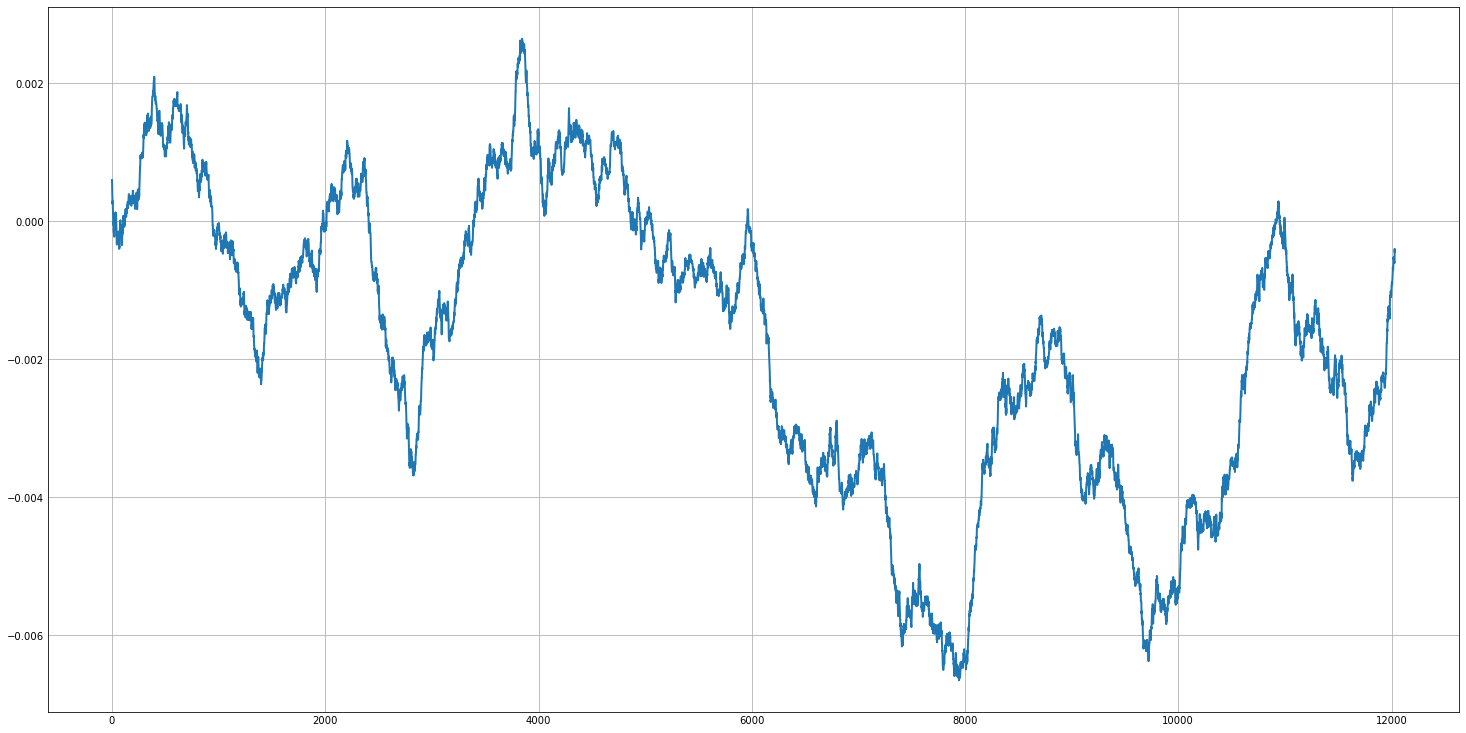

In [6]:
y_ma = moving_avarage(y, 1000)
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(x[:len(y_ma)], y_ma, linewidth=2.0)

plt.show()